## 📈 NVIDIA Stock Price Dataset (1999 - 2025) 🚀

### 📝 Dataset Overview

This dataset contains historical stock price data for NVIDIA Corporation (NVDA) from *1999 to 2025, extracted from *Yahoo Finance using the yfinance library. NVIDIA is a global leader in AI, gaming, and high-performance computing, making its stock highly relevant for financial analysis and machine learning models.

### 📊 Data Summary

Column Name	Description

📅 Date--->	Trading date (YYYY-MM-DD)
⬆ Open---->  Opening stock price of the day
🔼 High---->  Highest stock price of the day
🔽 Low---->	 Lowest stock price of the day
📉 Close----> Closing stock price of the day
🔄 Adj Close--->  Adjusted closing price after stock splits & dividends
📦 Volume---->  Number of shares trade



## Project Overview
This project analyzes NVIDIA's stock prices from January 1999 to February 2025 using time series analysis techniques. The project includes exploratory data analysis (EDA), data preprocessing, stock price prediction, and evaluation using metrics such as RMSE and MAPE. Various prediction algorithms, including Simple Moving Average (SMA), Exponential Weighted Moving Average (EWMA), and Long Short-Term Memory (LSTM), are applied to forecast trends.

---

## 1. Exploratory Data Analysis (EDA) with Time Series
### 1.1 Data Reading
- The dataset consists of daily stock prices of NVIDIA from 1999 to 2025.
- The 'Date' column is set as the index to facilitate time series analysis.

### 1.2 Time Resampling
- Resampling is performed to analyze stock prices at different intervals (weekly, monthly, yearly) for trend identification.

### 1.3 Time Shifts
- Shifting data forward or backward helps in understanding past trends' influence on future values.

### 1.4 Rolling Mean and Expanding Mean
- Rolling mean smooths out short-term fluctuations to highlight longer-term trends.
- Expanding mean considers all available data up to the current point for trend analysis.

### 1.5 Time Series Visualization
- Various attributes such as 'Open', 'High', 'Low', 'Close', 'Volume' are plotted over time to identify patterns.
- Moving averages (10-day, 30-day, 50-day) are compared with actual stock prices.

### 1.6 Observations
1. The data spans from January 1999 to February 2025.
2. There is an overall increase in 'High' values over the years.
3. A decline in stock prices was observed between 2020 and 2024.
4. Volume of traded shares significantly decreased in early 2022, a year before the dip in stock prices.
5. The adjusted closing price saw a sudden increase after 2023.
6. On January 7, 2025, NVIDIA achieved its highest stock price of 153.13 USD
7. The 10-day SMA closely follows the actual stock price, suggesting a strong trend.
8. The 50-day EWMA provides better smoothing and interpretability.
9. The lowest stock price was recorded on June 3, 1999, at $0.035.

---

## 2. Data Preprocessing
### 2.1 Standardization
- StandardScaler is used instead of MinMaxScaler to handle stock price fluctuations more effectively.

### 2.2 Training and Testing Data Split
- The dataset is split into training and testing sets for model evaluation.

---

## 3. Prediction Models
### 3.1 Moving Average (MA)
- SMA is used for trend identification.
- Common periods used: 20-day (short-term), 50-day (medium-term), 200-day (long-term).
- SMA provides a general idea of price trends but lags behind real-time fluctuations.

### 3.2 Exponential Weighted Moving Average (EWMA)
- EWMA assigns higher weights to recent prices, making it more responsive to market changes.
- The 50-day EWMA shows better trend identification than the 200-day EWMA.

### 3.3 Long Short-Term Memory (LSTM)
- LSTM, a deep learning model, is applied for stock price prediction.
- Hyperparameters:
  - LSTM units: 128
  - Optimizer: Adam (learning rate = 0.0001)
  - Epochs: 50
  - Batch size: 32
- Data is transformed using a predefined function that takes 50 past data points to predict the next value.

---

## 4. Evaluation Metrics
### 4.1 Root Mean Squared Error (RMSE)
- Measures the difference between predicted and actual values.

### 4.2 Mean Absolute Percentage Error (MAPE)
- Evaluates the relative accuracy of predictions compared to actual values.

| Model  | RMSE | MAPE (%) |
|--------|------|----------|
| SMA    | 6.8688 | 10.7071 |
| EWMA   | 6.0438 | 9.5945  |
| LSTM   | 7.5679 | 6.1034  |

**Conclusion:**
- EWMA performs better than SMA in terms of trend analysis and prediction.
- LSTM provides promising results with the lowest MAPE, indicating good predictive accuracy.

---

## Future Improvements
- Implementing ARIMA and Prophet models for better time series forecasting.
- Hyperparameter tuning for LSTM to improve accuracy.
- Incorporating external market factors such as economic indicators and news sentiment analysis.
- Exploring Transformer-based deep learning models for stock prediction.

This analysis provides valuable insights into NVIDIA's stock price trends and forecasting, leveraging various statistical and machine learning techniques.



# Agenda 1

#### 1. EDA with Time series
   1.1 Data reading 
   1.2 Time Resampling
   1.3 Time Shifts
   1.4 Mean Rolling and Expanding
   1.5 Time series Visualization
   1.6 One sample project on Time series

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('NVDA.csv')

In [3]:
df.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,1999-01-22,0.037615,0.041016,0.048828,0.038802,0.043750,2714688000
1,1999-01-25,0.041556,0.045313,0.045833,0.041016,0.044271,510480000
2,1999-01-26,0.038331,0.041797,0.046745,0.041146,0.045833,343200000
3,1999-01-27,0.038212,0.041667,0.042969,0.039583,0.041927,244368000
4,1999-01-28,0.038092,0.041536,0.041927,0.041276,0.041667,227520000


In [4]:
df.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,1999-01-22,0.037615,0.041016,0.048828,0.038802,0.043750,2714688000
1,1999-01-25,0.041556,0.045313,0.045833,0.041016,0.044271,510480000
2,1999-01-26,0.038331,0.041797,0.046745,0.041146,0.045833,343200000
3,1999-01-27,0.038212,0.041667,0.042969,0.039583,0.041927,244368000
4,1999-01-28,0.038092,0.041536,0.041927,0.041276,0.041667,227520000


In [5]:
 df.tail()

,Date,Adj Close,Close,High,Low,Open,Volume
6553,2025-02-10,133.570007,133.570007,135.000000,129.960007,130.089996,216989100
6554,2025-02-11,132.800003,132.800003,134.479996,131.020004,132.580002,178902400
6555,2025-02-12,131.139999,131.139999,132.240005,129.080002,130.020004,160278600
6556,2025-02-13,135.289993,135.289993,136.500000,131.169998,131.559998,197430000
6557,2025-02-14,138.850006,138.850006,139.250000,135.500000,136.479996,194892300


### Key points

1. Date Conversion: Ensure the 'Date' column is in datetime format for proper plotting.

2. Setting the Index: By setting 'Date' as the index, you can directly use it when plotting any column.

In [6]:
# Convert the 'Date' column to datetime format  
df['Date'] = pd.to_datetime(df['Date'])
# Set 'Date' as the index  
df.set_index('Date', inplace=True)

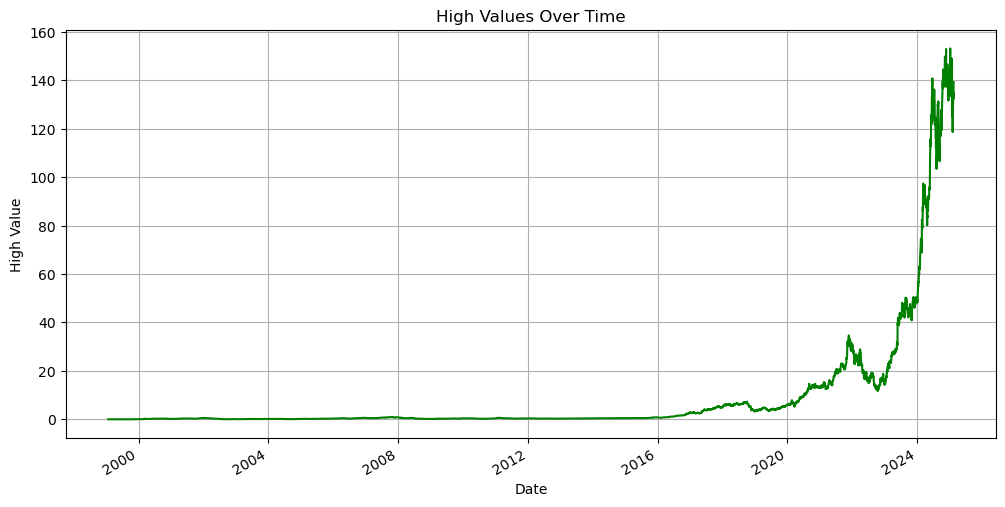

In [7]:
df['High'].plot(figsize=(12,6),c='green')
plt.title('High Values Over Time')  
plt.xlabel('Date')  
plt.ylabel('High Value')  
plt.grid()  
plt.show()  

### Observations

1. Just to be exact the data is from Jan 1999 to february 2025
2. There is an Overall increase in the value of 'High'    with the growing Years 

3. However, between 2020 and 2024 We can see a dip in value.

4. So just to get a clear image between 2020 to 2024 We are going to set xlimit

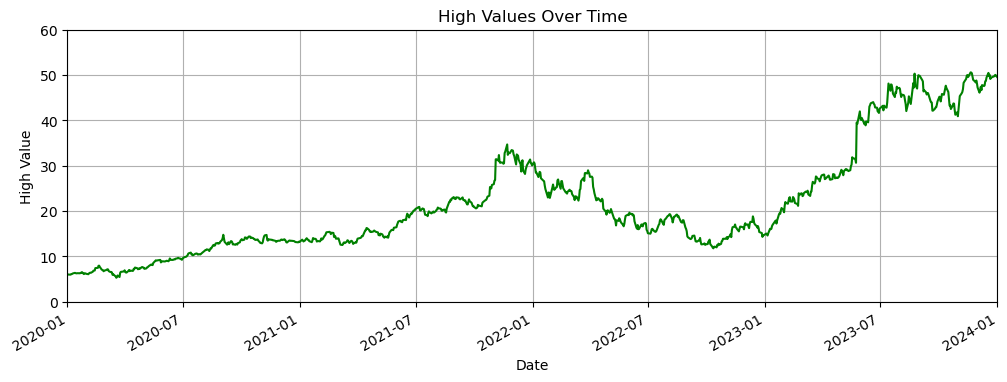

In [8]:
## xlimit and ylimit  and Coloring

df['High'].plot(xlim=['2020-01-01','2024-01-01'],ylim=[0,60],figsize=(12,4),c='green')
plt.title('High Values Over Time')  
plt.xlabel('Date')  
plt.ylabel('High Value')  
plt.grid()  
plt.show() 

5. We notice that the dip mentioned above has started from about 2022-01 to 2023-07  and after that it gradually improved

In [9]:
index=df.loc['2020-01-01':'2024-01-01'].index
share_Volume=df.loc['2020-01-01':'2024-01-01']['Volume']

In [10]:
share_Volume

Date
2020-01-02    237536000
2020-01-03    205384000
2020-01-06    262636000
2020-01-07    314856000
2020-01-08    277108000
                ...    
2023-12-22    252507000
2023-12-26    244200000
2023-12-27    233648000
2023-12-28    246587000
2023-12-29    389293000
Name: Volume, Length: 1006, dtype: int64

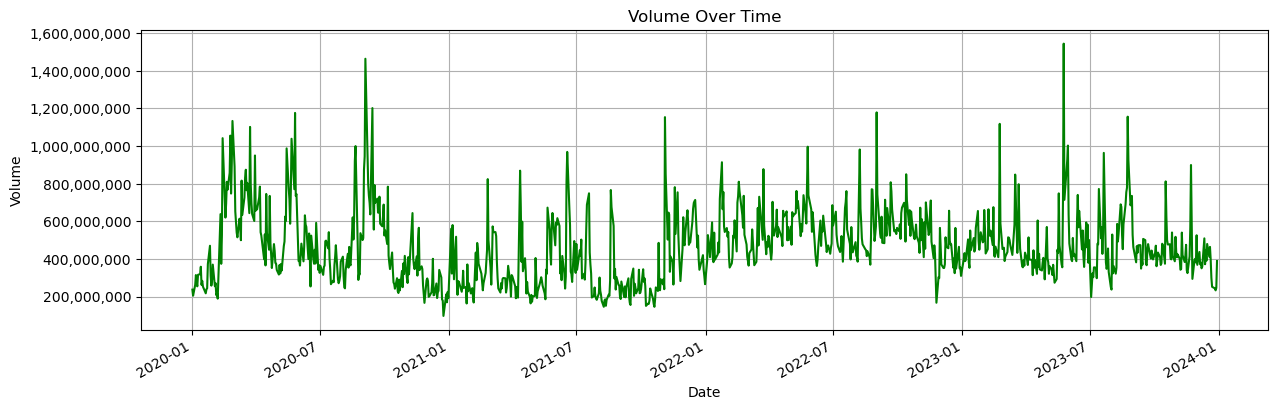

In [11]:
# Create a figure with a specific size  
figure,axis=plt.subplots(figsize=(12,4))

# Adjust layout for better spacing
plt.tight_layout()

# This method automatically formats the x-axis dates to improve readability.
figure.autofmt_xdate()

# Format the y-axis to show integers with commas 
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x):,}"))

# Plot the share volume against the index in green 
axis.plot(index,share_Volume,color='green')
plt.title('Volume Over Time')  
plt.xlabel('Date')  
plt.ylabel('Volume')  
plt.grid()  
plt.show() 

6. Here, on basis of Volume attribute also we can see that Volume amount decreases in 2022-01. 
7. However, a significant trend observed is that the number of shares traded began to decline in late 2020, roughly a year before the decrease in the 'high' attribute values.

## Time Resampling

In time series, data consistency is of prime importance, resampling ensures that the data is distributed with a consistent frequency. Resampling can also provide a different perception of looking at the data, in other words, it can add additional insights about the data based on the resampling frequency.

Two types of resampling are:

#### Upsampling
Where you increase the frequency of the samples, such as from minutes to seconds.
#### Downsampling:
Where you decrease the frequency of the samples, such as from days to months.

In the case of upsampling, care may be needed in determining how the fine-grained observations are calculated using interpolation. In the case of downsampling, care may be needed in selecting the summary statistics used to calculate the new aggregated values.

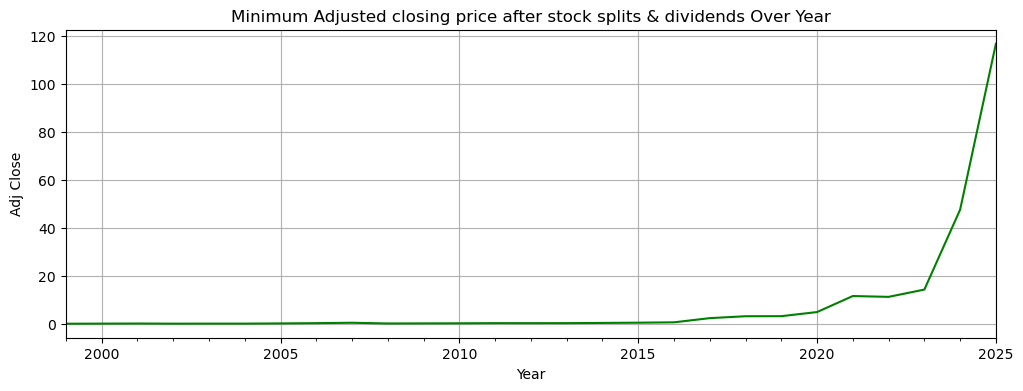

In [12]:
# We can downsample the data using the alias “A” for year-end frequency

# This showing the minimum value of each attribute obtained per year and the date when minimum value was observed
df_resample_Year_min=df.resample(rule='A').min()
df_resample_Year_min['Adj Close'].plot(figsize=(12,4),c='green')
plt.title('Minimum Adjusted closing price after stock splits & dividends Over Year')  
plt.xlabel('Year')  
plt.ylabel('Adj Close')  
plt.grid()  
plt.show() 

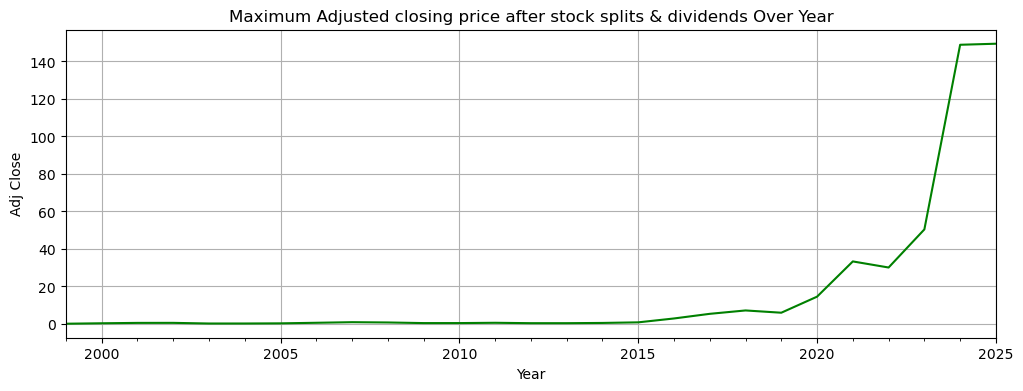

In [13]:
# This showing the maximum value of each attribute obtained per year and the date when maximum value was observed
df_resample_Year_max=df.resample(rule='A').max()
df_resample_Year_max['Adj Close'].plot(figsize=(12,4),c='green')
plt.title('Maximum Adjusted closing price after stock splits & dividends Over Year')  
plt.xlabel('Year')  
plt.ylabel('Adj Close')  
plt.grid()  
plt.show() 

8. Seeing both min and max Adjusted closing price we can overall state that there was a sudden increase in price after 2023 Year

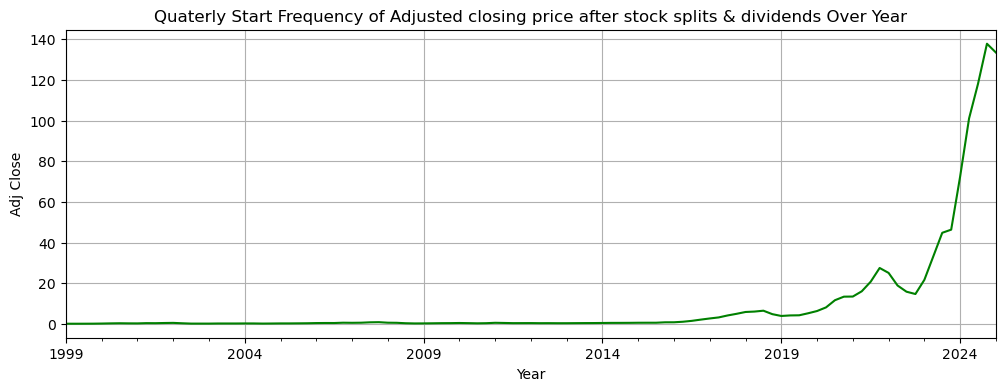

In [14]:
# This showing the Average Quaterly Start Frequency of each attribute obtained per year and the date when maximum value was observed
df_resample_Year_QS=df.resample(rule='QS').mean()
df_resample_Year_QS['Adj Close'].plot(figsize=(12,4),c='green')
plt.title('Quaterly Start Frequency of Adjusted closing price after stock splits & dividends Over Year')  
plt.xlabel('Year')  
plt.ylabel('Adj Close')  
plt.grid()  
plt.show() 

9. Same Observation for year 2023 Was observed if Rule Quaterly Start Frequency is Applied. Note that it has taken an Avg of Adj Close

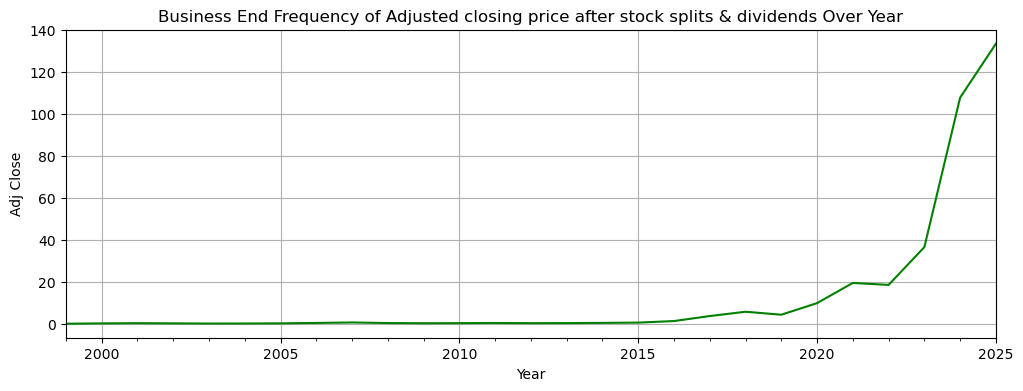

In [15]:
# This showing the Average Business End Frequency of each attribute obtained per year and the date when maximum value was observed
df_resample_Year_BA=df.resample(rule='BA').mean()
df_resample_Year_BA['Adj Close'].plot(figsize=(12,4),c='green')
plt.title('Business End Frequency of Adjusted closing price after stock splits & dividends Over Year')  
plt.xlabel('Year')  
plt.ylabel('Adj Close')  
plt.grid()  
plt.show() 

10. Same Observation for year 2023 Was observed if Rule Business End Frequency is Applied. Note that it has taken an Avg of Adj Close

## Dataset Analysis

For model training, we will use the oldest 80% of the data, and save the most recent 20% as the holdout testing set

In [16]:
test_ratio=0.2
training_ratio=1-test_ratio

train_size=int(training_ratio * len(df))
test_size=int(test_ratio*len(df))

print("training:",train_size)
print("testing:",test_size)

train=df[:train_size][['Close']]
test=df[train_size:][['Close']]

training: 5246
testing: 1311


## Rolling in Time Series

In time series analysis, "rolling" refers to a technique used to compute statistics over a moving window of data points. This approach allows analysts to observe how certain metrics change over time, providing insights into trends, seasonality, and other patterns that may not be immediately apparent from the raw data.

### Key Aspects of Rolling in Time Series:

1. **Rolling Window**: A specified number of consecutive data points is selected, and calculations (like mean, sum, standard deviation, etc.) are performed on this window. The window then "rolls" forward by one data point, and the calculations are repeated.

2. **Types of Rolling Statistics**:
   - **Rolling Mean**: The average of the values within the window.
   - **Rolling Sum**: The total sum of the values within the window.
   - **Rolling Standard Deviation**: A measure of the amount of variation or dispersion of the values within the window.

3. **Application**: Rolling statistics are often used to smooth out short-term fluctuations and highlight longer-term trends or cycles. For instance, a rolling mean can help in identifying the underlying trend in stock prices or economic indicators.

4. **Choosing Window Size**: The size of the rolling window is crucial and can significantly affect the analysis. A smaller window may capture more noise, while a larger window may smooth out important short-term variations.

5. **Visualization**: Rolling statistics are often visualized alongside the original time series data to make it easier to interpret trends and patterns.

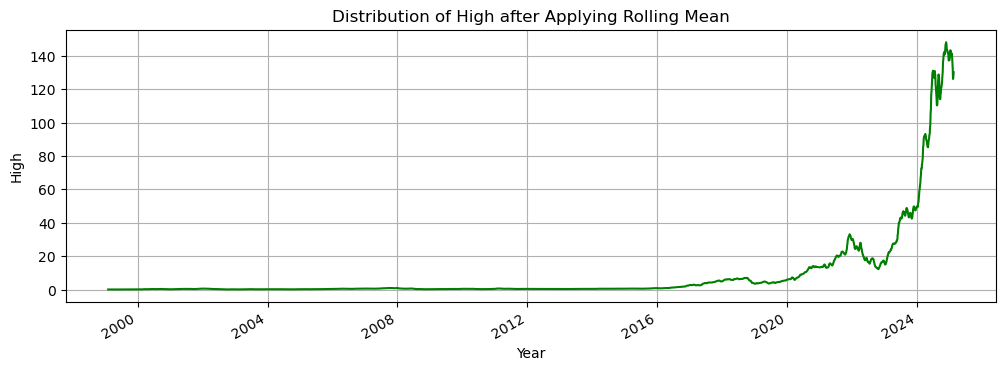

In [17]:
df['High'].rolling(10).mean().plot(figsize=(12,4),c='green')

plt.title('Distribution of High after Applying Rolling Mean')  
plt.xlabel('Year')  
plt.ylabel('High')  
plt.grid()  
plt.show() 

SMA is calculated by taking the arithmetic mean of a fixed number of past values.

Example: For a 3-day SMA of prices 
[10,20,30,40]
[10,20,30,40],

𝑆𝑀𝐴3=(10+20+30)/3=20

#### Disadvantage of using this method is that it will give same importance to all the data

In [18]:
#Simple Moving Average
df['Open:30 Days Rolling']=df['Open'].rolling(window=30, min_periods=1).mean()
df['Open:10 Days Rolling']=df['Open'].rolling(window=10, min_periods=1).mean()
df['Open:50 Days Rolling']=df['Open'].rolling(window=50, min_periods=1).mean()

In [19]:
df.head()

,Adj Close,Close,High,Low,Open,Volume,Open:30 Days Rolling,Open:10 Days Rolling,Open:50 Days Rolling
Date,,,,,,,,,
1999-01-22,0.037615,0.041016,0.048828,0.038802,0.043750,2714688000,0.043750,0.043750,0.043750
1999-01-25,0.041556,0.045313,0.045833,0.041016,0.044271,510480000,0.044010,0.044010,0.044010
1999-01-26,0.038331,0.041797,0.046745,0.041146,0.045833,343200000,0.044618,0.044618,0.044618
1999-01-27,0.038212,0.041667,0.042969,0.039583,0.041927,244368000,0.043945,0.043945,0.043945
1999-01-28,0.038092,0.041536,0.041927,0.041276,0.041667,227520000,0.043490,0.043490,0.043490


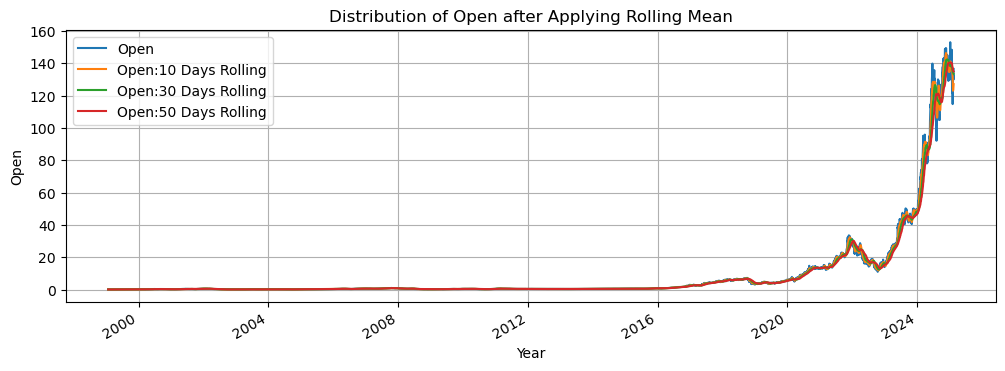

In [20]:
df[['Open','Open:10 Days Rolling','Open:30 Days Rolling','Open:50 Days Rolling']].plot(figsize=(12,4))
#This shows the Difference in its Value over the Years
#After Rolling 'Open:30 Days Rolling' shows a more smoothened Progress of Values for Easier Interpretation
plt.title('Distribution of Open after Applying Rolling Mean')  
plt.xlabel('Year')  
plt.ylabel('Open')  
plt.grid()  
plt.show() 

From the plotted image, it is clear that the 10-day, 30-day, and 50-day SMAs are closely following the original "Open" price, with minimal lag. This suggests:

#### 1. The data is in a strong trend –
Since the moving averages are not deviating significantly, the price is following a clear pattern.

#### 2. Shorter-period SMA (10-day) is hugging the price more closely – 
This makes it more responsive to changes.

#### 3. Longer-period SMA (50-day) is still quite close –
It indicates that even with smoothing, there isn’t much deviation, possibly due to consistent trends in the data.

##### This means that the SMA is working well for your dataset despite its inherent limitation of giving equal weight to all past data points. However, if the market turns volatile, an Exponential Moving Average (EMA) might provide better responsiveness. 

### What is the Date of the Highest Price of the stock?

In [21]:
# Note here as Date is set as Index it is not shown in columns
df.columns

Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume',
       'Open:30 Days Rolling', 'Open:10 Days Rolling', 'Open:50 Days Rolling'],
      dtype='object')

In [22]:
# For the highest price of the stock we will be using Column 'High'
Maximum_Stock_Price=df['High'].max()
print("Highest Stock Price",df['High'].max())
When_Highest_Price = df.loc[df['High']==Maximum_Stock_Price].index  
print("Date: ",When_Highest_Price)

Highest Stock Price 153.1300049
Date:  DatetimeIndex(['2025-01-07'], dtype='datetime64[ns]', name='Date', freq=None)


11. Thus, On 7 January 2025 Nvidia achieved the highest Stock price of value 153.130049 USD

### What is the Date of the Lowest Price of the stock?

In [23]:
# For the highest price of the stock we will be using Column 'High'
Minimum_Stock_Price=df['High'].min()
print("Lowest Stock Price",df['High'].min())
When_lowest_Price = df.loc[df['High']==Minimum_Stock_Price].index  
print("Date: ",When_lowest_Price)

Lowest Stock Price 0.035546999
Date:  DatetimeIndex(['1999-06-03'], dtype='datetime64[ns]', name='Date', freq=None)


12. On 03 June 1999 it had the Lowest Price of 0.035 USD

## Types Of Trends

1. Upward Trend 
2. Stationary Trend
3. Downward Trend
4. Cyclic Trend

# Agenda 2

 Cumulative Moving Average, Exponential Weight Moving Average, Moving Average (Formula) 

In [24]:
df.index

DatetimeIndex(['1999-01-22', '1999-01-25', '1999-01-26', '1999-01-27',
               '1999-01-28', '1999-01-29', '1999-02-01', '1999-02-02',
               '1999-02-03', '1999-02-04',
               ...
               '2025-02-03', '2025-02-04', '2025-02-05', '2025-02-06',
               '2025-02-07', '2025-02-10', '2025-02-11', '2025-02-12',
               '2025-02-13', '2025-02-14'],
              dtype='datetime64[ns]', name='Date', length=6558, freq=None)

In [25]:
from datetime import datetime

In [26]:
df['Open']

Date
1999-01-22      0.043750
1999-01-25      0.044271
1999-01-26      0.045833
1999-01-27      0.041927
1999-01-28      0.041667
                 ...    
2025-02-10    130.089996
2025-02-11    132.580002
2025-02-12    130.020004
2025-02-13    131.559998
2025-02-14    136.479996
Name: Open, Length: 6558, dtype: float64

<AxesSubplot:xlabel='Date'>

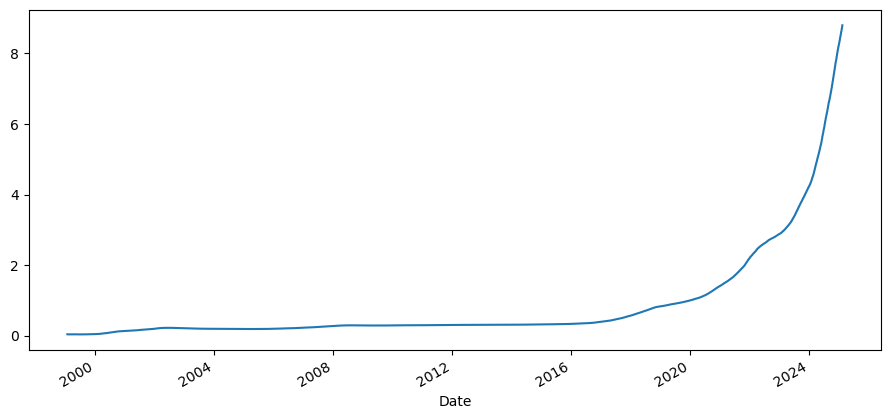

In [27]:
# Cumulative Moving Average

CMA=df['Open'].expanding().mean()
CMA.plot(figsize=(11,5))

### Exponential Moving Averages and EWMA

This is simply removing All the disadvantages of SMA

In [28]:
# Exponential Moving Averages
df['EMA_0.1']=df['Open'].ewm(alpha=0.1,adjust=False).mean()
# Exponentisl Weighted Moving Averages
df['EMA_5days']=df['Open'].ewm(span=5).mean()

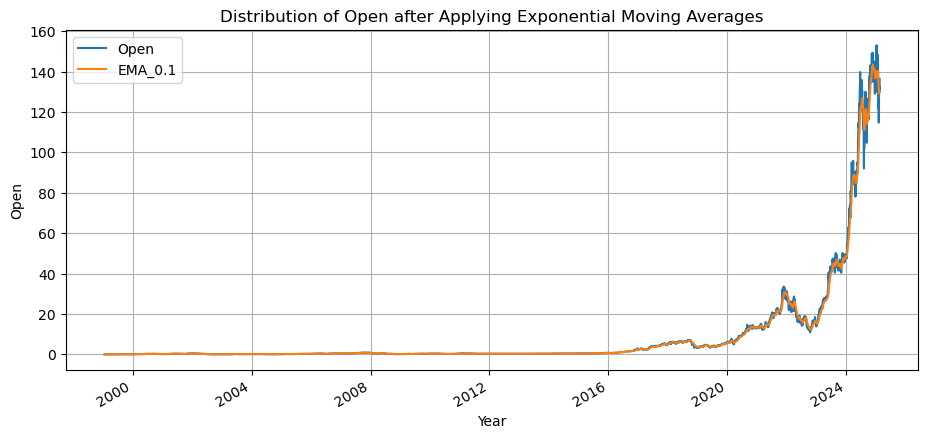

In [29]:
df[['Open','EMA_0.1']].plot(figsize=(11,5))
plt.title('Distribution of Open after Applying Exponential Moving Averages')  
plt.xlabel('Year')  
plt.ylabel('Open')  
plt.grid()  
plt.show() 

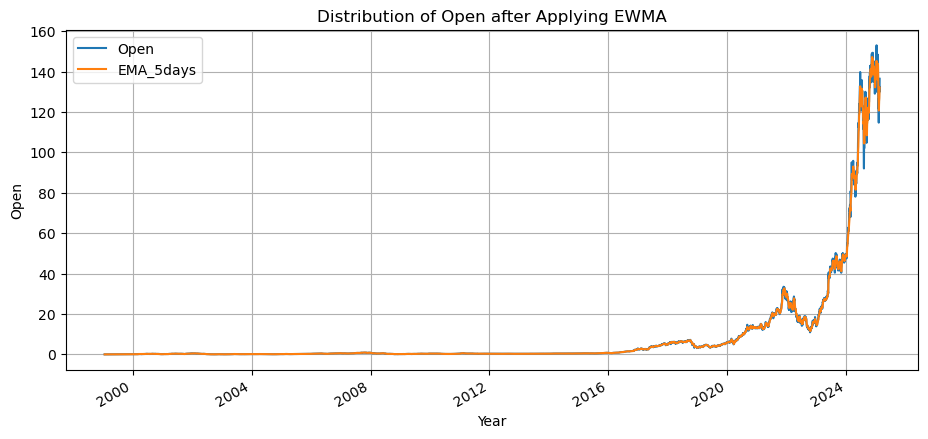

In [30]:
df[['Open','EMA_5days']].plot(figsize=(11,5))
plt.title('Distribution of Open after Applying EWMA')  
plt.xlabel('Year')  
plt.ylabel('Open')  
plt.grid()  
plt.show() 

###### As we can see EWMA works the best for Smoothning and Interpretability of Price Over years

## Evaluation Metrics and helper functions

since stock prices prediction is essentially a regression problem, the RSME(root mean squared error) and MAPE(Mean Absolute Percentage error %) will be our current model evaluation metrics. 

RSME gives the difference between predicted and true values, MAPE(%) mesures this difference relative to the true values

###### 1. Split the stock prices data into training sequence X and the next output value Y.

In [31]:
## Split the time-series data into training seq X and output value Y
def extract_seqX_outcomeY(data, N, offset):
    """
    Split time-series into training sequence X and outcome value Y
    Args:
        data - dataset
        N - window size, e.g., 50 for 50 days of historical stock prices
        offset - position to start the split
    """
    X, y = [], []

    for i in range(offset, len(data)):
        X.append(data[i - N : i])
        y.append(data[i])

    return np.array(X), np.array(y)

###### 2. Calculate the RMSE and MAPE (%)

In [32]:
#### Calculate the metrics RMSE and MAPE ####
def calculate_rmse(y_true, y_pred):
    """
    Calculate the Root Mean Squared Error (RMSE)
    """
    rmse = np.sqrt(np.mean((y_true - y_pred) ** 2))
    return rmse


def calculate_mape(y_true, y_pred):
    """
    Calculate the Mean Absolute Percentage Error (MAPE) %
    """
    y_pred, y_true = np.array(y_pred), np.array(y_true)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mape

###### 3. Calculate the evaluation metrics for technical analysis

In [33]:
def calculate_perf_metrics(var):
    ### RMSE
    rmse = calculate_rmse(
        np.array(df[train_size:]["Close"]),
        np.array(df[train_size:][var]),
    )
    ### MAPE
    mape = calculate_mape(
        np.array(df[train_size:]["Close"]),
        np.array(df[train_size:][var]),
    )

    ## Log to Neptune
    print("RMSE", rmse)
    print("MAPE (%)", mape)

    return rmse, mape

###### 4. Plot the trend of the stock prices

In [34]:
def plot_stock_trend(var, cur_title, stockprices=df):
    ax = stockprices[["Close", var, "200day"]].plot(figsize=(20, 10))
    plt.grid(False)
    plt.title(cur_title)
    plt.axis("tight")
    plt.ylabel("Stock Price ($)")

## Predicting stock price with Moving Average (MA) technique

MA is a popular method to smooth out random Movements in the stock market. MA is an average that moves along the time scale/ periods; older data points get dropped as newer data points are added. 

Commonly used periods are 20-day, 50-day, and 200-day MA for short-term, medium-term, and long-term investment respectively. 

##### as mentioned above Exponential Weighted Moving Average works best for the given data so this will be applied but for Close attribute

RMSE 6.868756782329269
MAPE (%) 10.707098465834921


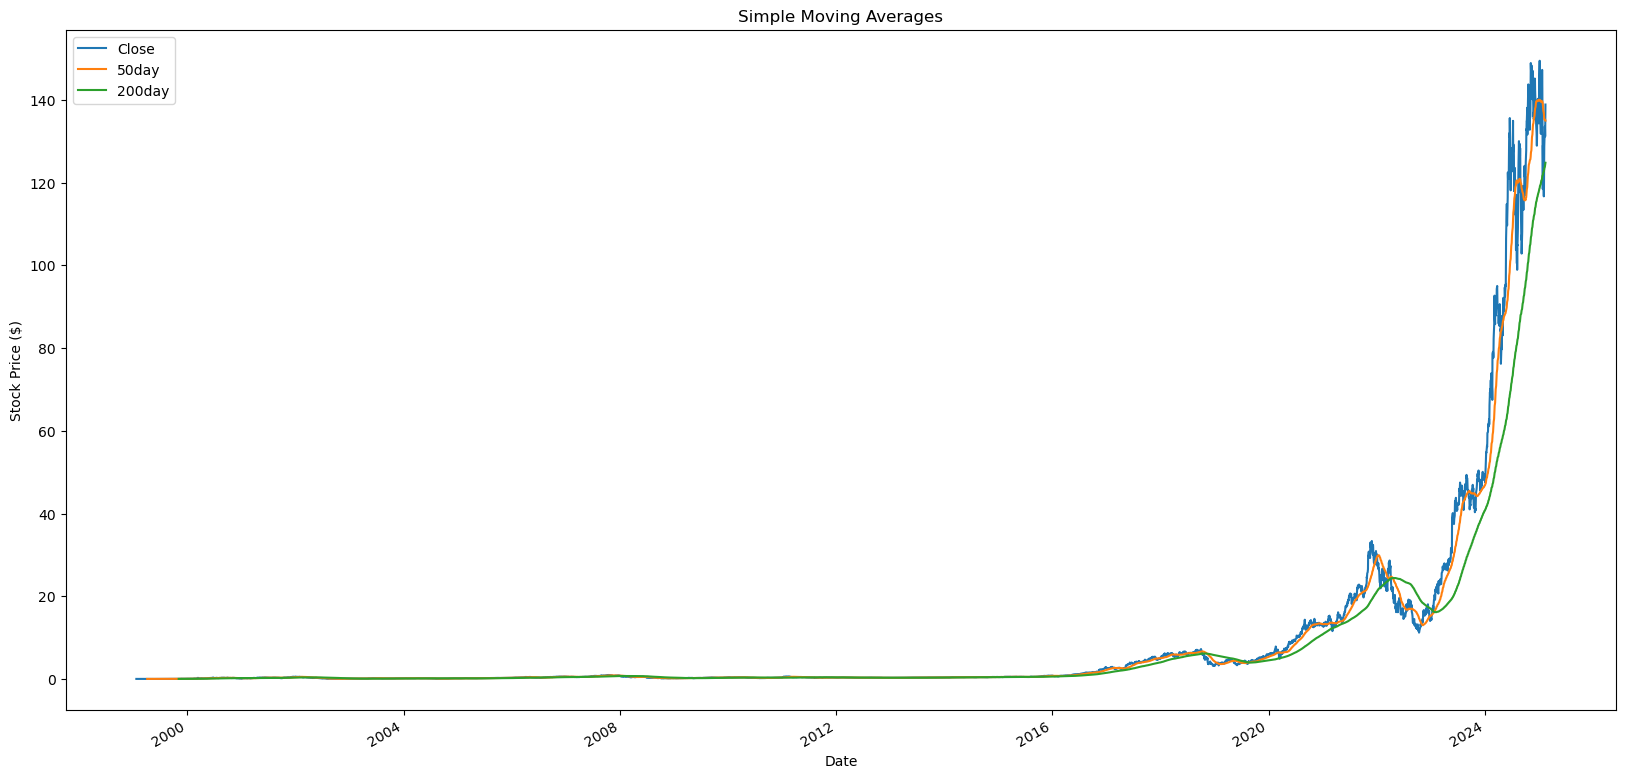

In [35]:
window_size=50
window_var = f"{window_size}day"


df[window_var] = df["Close"].rolling(window_size).mean()

### Include a 200-day SMA for reference
df["200day"] = df["Close"].rolling(200).mean()

### Plot and performance metrics for SMA model
plot_stock_trend(var=window_var, cur_title="Simple Moving Averages")
rmse_sma, mape_sma = calculate_perf_metrics(var=window_var)

RMSE 6.043798508980604
MAPE (%) 9.594491915237722


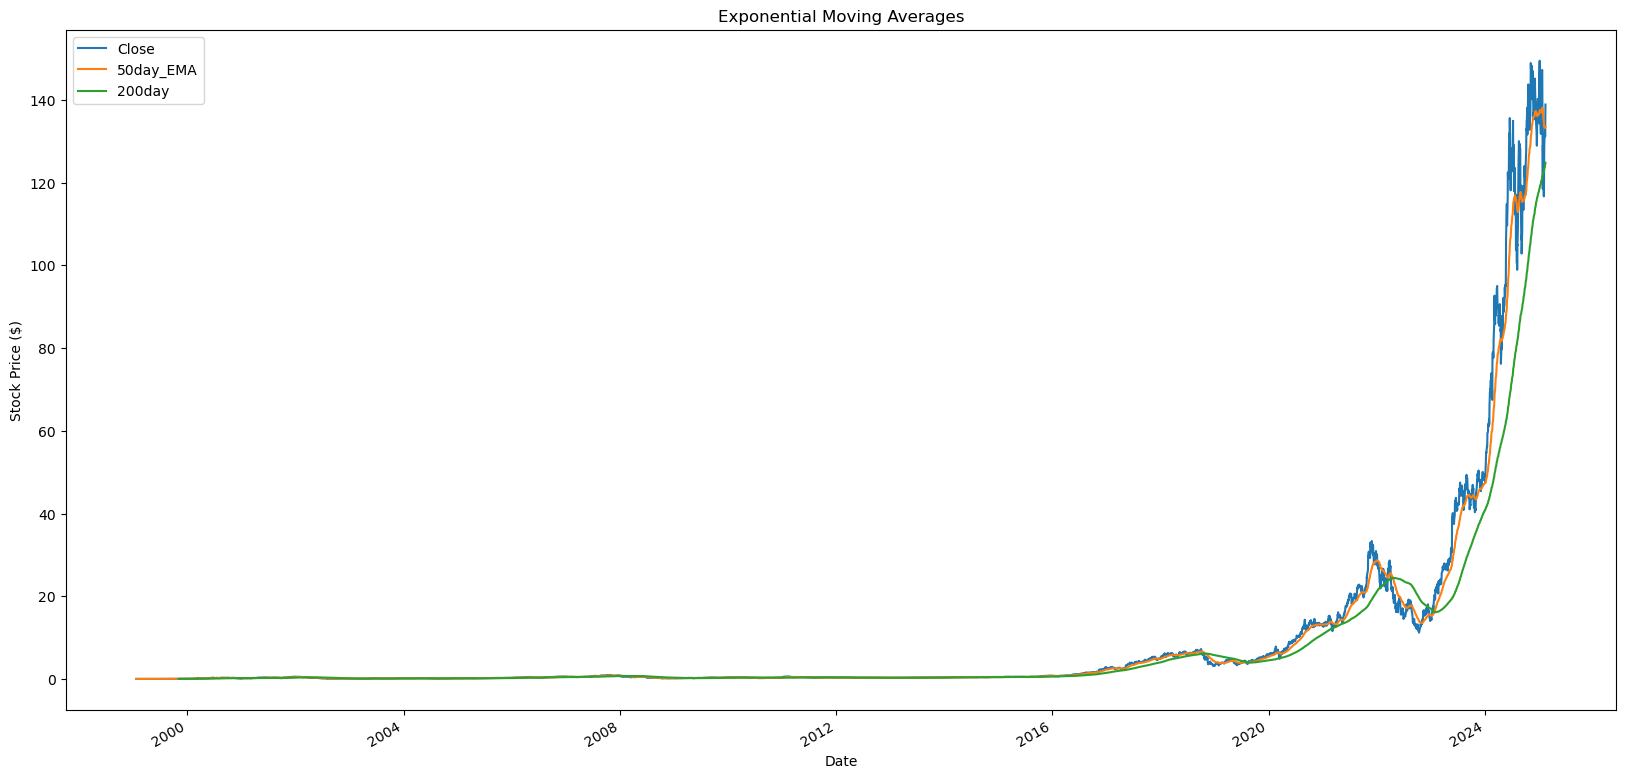

In [36]:
window_size=50
window_var = f"{window_size}day"

###### Exponential MA
window_ema_var = f"{window_var}_EMA"

# Calculate the 50-day exponentially weighted moving average
df[window_ema_var] = (
    df["Close"].ewm(span=window_size, adjust=False).mean()
)
df["200day"] = df["Close"].rolling(200).mean()

### Plot and performance metrics for EMA model
plot_stock_trend(
    var=window_ema_var, cur_title="Exponential Moving Averages")
rmse_ema, mape_ema = calculate_perf_metrics(var=window_ema_var)

###### 50-day EWMA is a better trend indicator than the 200-day EWMA in terms of (short-to-) medium movements

### LSTMs for the time-series data

 LSTM, short for Long Short-term Memory, is an extremely powerful algorithm for time series. It can capture historical trend patterns, and predict future values with high accuracy. 
 
 #### In a nutshell, the key component to understand an LSTM model is the Cell State (Ct), which represents the internal short-term and long-term memories of a cell. 
 
 To control and manage the cell state, an LSTM model contains three gates/layers. It’s worth mentioning that the “gates” here can be treated as filters to let information in (being remembered) or out (being forgotten). 
 
 1. Forget Gate
 2. Input Gate
 3. Output Gate

In [37]:
from keras.optimizers import Adam 
# Adjusted hyperparameters for LSTM to potentially improve accuracy  
layer_units = 128  # Increase the number of LSTM units for more capacity  
optimizer = "adam"  # Adam is generally a good choice, we will adjust learning rate  
cur_epochs = 50     # Increase epochs to allow more training time, could help convergence  
cur_batch_size = 32 # Adjust batch size to a larger value for better gradient estimates  

# Compile the adjusted LSTM arguments  
cur_LSTM_args = {  
    "units": layer_units,  
    "optimizer": Adam(learning_rate=0.0001),  # Optionally adjust learning rate if needed  
    "batch_size": cur_batch_size,  
    "epochs": cur_epochs,  
}  

Next, we scale the input data for LSTM model regulation and split it into train and test sets.

In [38]:
from sklearn import preprocessing
from tensorflow.keras.layers import Input  

# Scale our dataset
scaler = preprocessing.StandardScaler()
scaled_data = scaler.fit_transform(df[["Close"]])
scaled_data_train = scaled_data[: train.shape[0]]

# We use past 50 days’ stock prices for our training to predict the 51th day's closing price.
X_train, y_train = extract_seqX_outcomeY(scaled_data_train, window_size, window_size)

A couple of notes:

1. we use the StandardScaler, rather than the MinMaxScaler as you might have seen before. The reason is that stock prices are ever-changing, and there are no true min or max values. It doesn’t make sense to use the MinMaxScaler, although this choice probably won’t lead to disastrous results at the end of the day;

2. stock price data in its raw format can’t be used in an LSTM model directly; we need to transform it using our pre-defined `extract_seqX_outcomeY` function. For instance, to predict the 51st price, this function creates input vectors of 50 data points prior and uses the 51st price as the outcome value.

In [40]:
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import Model  
### Build a LSTM model 
def Run_LSTM(X_train, layer_units=50):
    inp = Input(shape=(X_train.shape[1], 1))

    x = LSTM(units=layer_units, return_sequences=True)(inp)
    x = LSTM(units=layer_units)(x)
    out = Dense(1, activation="linear")(x)
    model = Model(inp, out)

    # Compile the LSTM neural net
    model.compile(loss="mean_squared_error", optimizer="adam")

    return model


model = Run_LSTM(X_train, layer_units=layer_units)

history = model.fit(
    X_train,
    y_train,
    epochs=cur_epochs,
    batch_size=cur_batch_size,
    verbose=1,
    validation_split=0.1,
    shuffle=True, 
)

Epoch 1/50
147/147 [==============================] - 38s 200ms/step - loss: 0.0024 - val_loss: 0.0022
Epoch 2/50
147/147 [==============================] - 27s 183ms/step - loss: 3.8906e-05 - val_loss: 3.5571e-04
Epoch 3/50
147/147 [==============================] - 27s 184ms/step - loss: 7.2721e-06 - val_loss: 1.6841e-04
Epoch 4/50
147/147 [==============================] - 27s 184ms/step - loss: 4.7640e-06 - val_loss: 1.7830e-04
Epoch 5/50
147/147 [==============================] - 27s 184ms/step - loss: 5.0683e-06 - val_loss: 1.7232e-04
Epoch 6/50
147/147 [==============================] - 27s 186ms/step - loss: 5.0763e-06 - val_loss: 1.7708e-04
Epoch 7/50
147/147 [==============================] - 27s 186ms/step - loss: 5.1319e-06 - val_loss: 1.8394e-04
Epoch 8/50
147/147 [==============================] - 27s 181ms/step - loss: 5.1399e-06 - val_loss: 1.7898e-04
Epoch 9/50
147/147 [==============================] - 27s 186ms/step - loss: 5.9709e-06 - val_loss: 1.7540e-04
Epoch 10/

Once the training completes, we’ll test the model against our hold-out set.

In [47]:
# predict stock prices using past window_size stock prices
def preprocess_testdat(data=df, scaler=scaler, window_size=window_size, test=test):
    raw = data["Close"][len(data) - len(test) - window_size:].values
    raw = raw.reshape(-1,1)
    raw = scaler.transform(raw)

    X_test = [raw[i-window_size:i, 0] for i in range(window_size, raw.shape[0])]
    X_test = np.array(X_test)

    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    return X_test

X_test = preprocess_testdat()

predicted_price_ = model.predict(X_test)
predicted_price = scaler.inverse_transform(predicted_price_)

# Plot predicted price vs actual closing price
test["Predictions_lstm"] = predicted_price

 1/41 [..............................] - ETA: 5s

C:\Users\91989\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


41/41 [==============================] - 5s 110ms/step


Time to calculate the performance metrics

RMSE 9.405364385458876
MAPE (%) 6.811074093478964


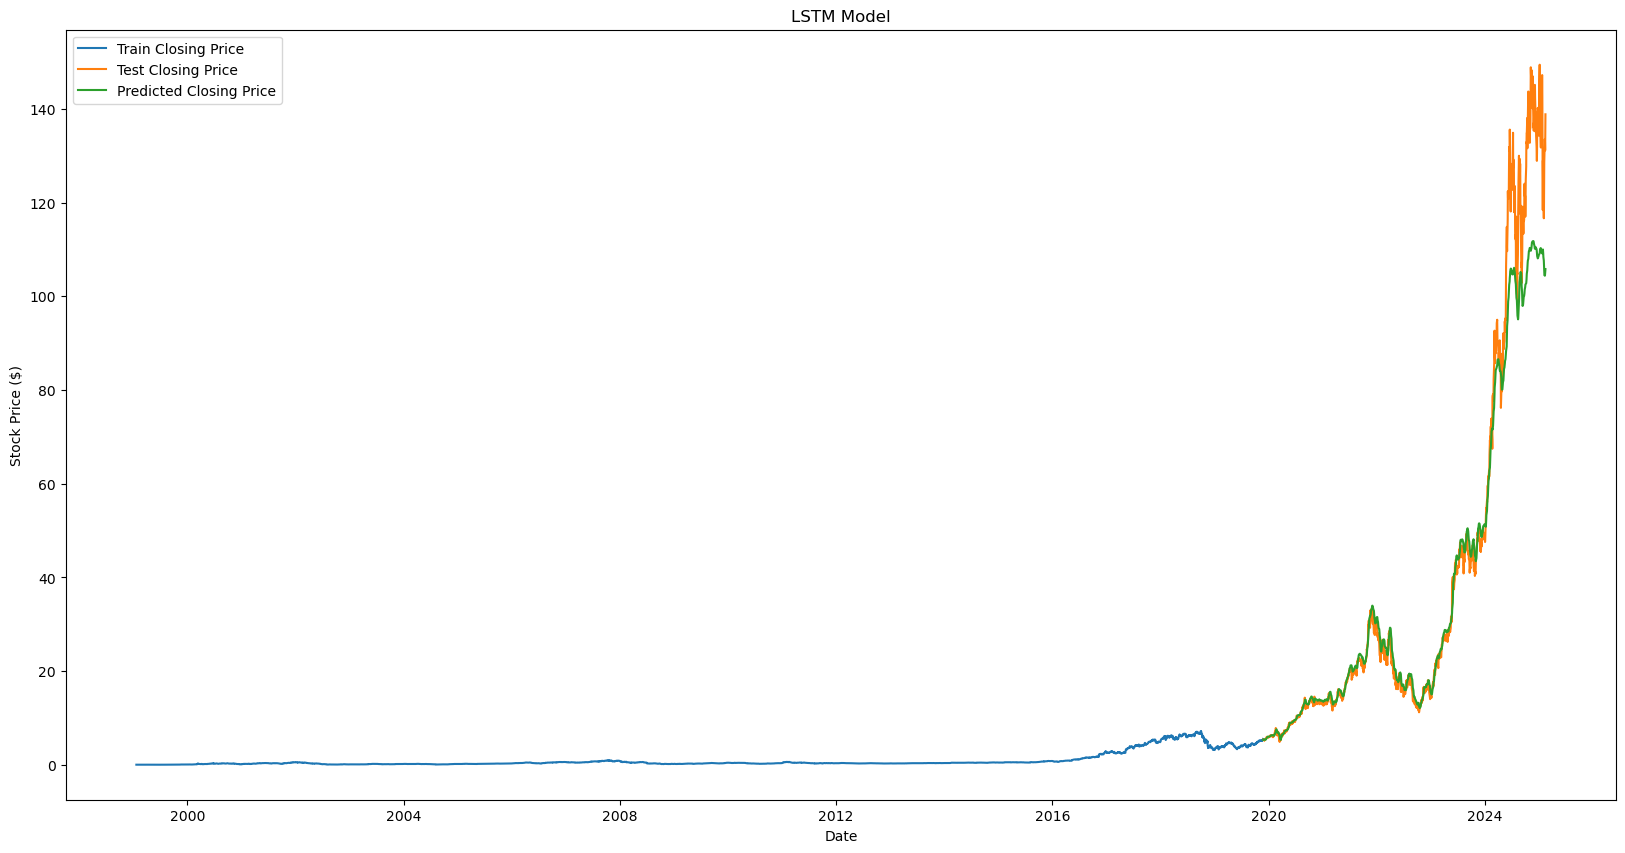

In [49]:
# Evaluate performance
rmse_lstm = calculate_rmse(np.array(test["Close"]), np.array(test["Predictions_lstm"]))
mape_lstm = calculate_mape(np.array(test["Close"]), np.array(test["Predictions_lstm"]))

print("RMSE" , rmse_lstm)
print("MAPE (%)" ,mape_lstm)

### Plot prediction and true trends and log to Neptune
def plot_stock_trend_lstm(train, test):
    fig = plt.figure(figsize = (20,10))
    plt.plot(np.asarray(train.index), np.asarray(train["Close"]), label = "Train Closing Price")
    plt.plot(np.asarray(test.index), np.asarray(test["Close"]), label = "Test Closing Price")
    plt.plot(np.asarray(test.index), np.asarray(test["Predictions_lstm"]), label = "Predicted Closing Price")
    plt.title("LSTM Model")
    plt.xlabel("Date")
    plt.ylabel("Stock Price ($)")
    plt.legend(loc="upper left")

plot_stock_trend_lstm(train, test)

Here we, can see RSME is although slightly increased but the MAPE is significantly reduced.